The data for this takes up a lot of space, please be advised you will need approximately 115 GB for all the data after doing the train/test split if the original data folder is retained.

Data for masked and incorrectly masked faces can be found at https://github.com/cabani/MaskedFace-Net

Download and unzip files 'CMFD' and 'IMFD', if downloading split folders move files from 'CMFD1' into CMFD and 'IMFD1' into 'IMFD'. Using windows batch file 'Unsubfolderer' drag 'CMFD' onto the batch file to move all images from subfolders into 'CMFD' and do the same for 'IMFD'. Rename 'CMFD' to 'correct' and 'IMFD' to 'incorrect' create folder named 'data' and place both 'correct' and 'incorrect' folders within it.

Data for unmasked faces can be found at https://www.kaggle.com/arnaud58/flickrfaceshq-dataset-ffhq

Download 'archive.zip' and unzip, move all files into a subfolder named 'none' within the 'data' folder

Data hierarchy should be as follows:

    workingdir/

    - data/
    
    -- correct/
    
    --- images of correctly worn facemasks
    
    -- incorrect/
    
    --- images of incorrectly worn facemasks
    
    -- none/
    
    --- images of faces without facemasks

In [9]:
from os import listdir # used to look into folders
import splitfolders # used to generate train test split
import matplotlib.pyplot as plt # used to generate charts
import numpy as np # needed for pyplot

In [17]:
splitfolders.ratio('data', output='split',seed=1337,ratio=(0.8,0,0.2)) # creates train/test split and creates folder for it

Copying files: 185783 files [1:55:51, 26.72 files/s]


In [17]:
def data_summary(main_path):
    '''
    This function takes in the root path of data and prints the total number of samples as well
    as the number of members of each class as well as their percentage of the total
    '''
        
    yes_path = main_path+'correct'
    inc_path = main_path+'incorrect'
    no_path = main_path+'none'

        
    # number of files (images) that are in the the folder named 'correct' that represent (positive) examples
    m_pos = len(listdir(yes_path))
    # number of files (images) that are in the the folder named 'incorrect' that represent (incorrect) examples
    m_inc = len(listdir(inc_path))
    # number of files (images) that are in the the folder named 'none' that represent (negative) examples
    m_neg = len(listdir(no_path))

    
    # number of all examples
    m = (m_pos+m_neg+m_inc)
    
    pos_prec = round((m_pos* 100.0)/ m, 2)
    inc_prec = round((m_inc* 100.0)/ m, 2)
    neg_prec = round((m_neg* 100.0)/ m, 2)

    
    print(f"Number of examples: {m}")
    print(f"Percentage of positive examples: {pos_prec}%, number of pos examples: {m_pos}") 
    print(f"Percentage of incorrect examples: {inc_prec}%, number of neg examples: {m_inc}")
    print(f"Percentage of negative examples: {neg_prec}%, number of neg examples: {m_neg}") 
    
    y = np.array([pos_prec, inc_prec, neg_prec])
    labels = ['Correctly Worn', 'Incorrectly Worn', 'No Mask']
    colors = ['green', 'yellow', 'red']
    ax = plt.figure()
    plt.pie(y, labels=labels, colors=colors)
    ax.patch.set_facecolor('lightgrey') # set background of chart to light grey
    plt.show()

Number of examples: 185783
Percentage of positive examples: 36.09%, number of pos examples: 67048
Percentage of incorrect examples: 35.92%, number of neg examples: 66734
Percentage of negative examples: 27.99%, number of neg examples: 52001


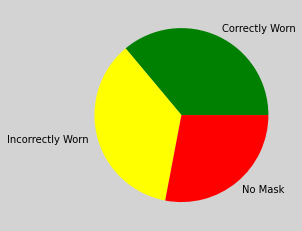

In [18]:
data_path = 'data/' # set path for all unsplit data
data_summary(data_path)

In [19]:
train_path = 'split/train/' #set path for training set
test_path = 'split/test/' #set path for testing set

## Summary of data in training set

Number of examples: 148625
Percentage of positive examples: 36.09%, number of pos examples: 53638
Percentage of incorrect examples: 35.92%, number of neg examples: 53387
Percentage of negative examples: 27.99%, number of neg examples: 41600


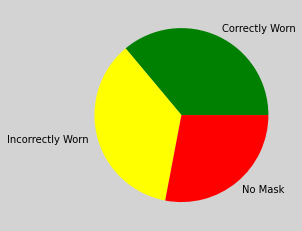

In [20]:
data_summary(train_path)

## Summary of data in testing set

Number of examples: 37158
Percentage of positive examples: 36.09%, number of pos examples: 13410
Percentage of incorrect examples: 35.92%, number of neg examples: 13347
Percentage of negative examples: 27.99%, number of neg examples: 10401


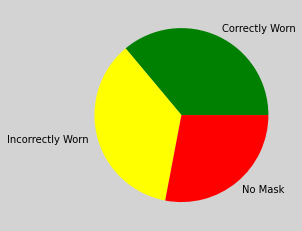

In [21]:
data_summary(test_path)